<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# **Project 3: NLP Classification - Identifying The Risk of Depression**

>Author: Gilbert, Han Kiong, Wee Zheng

---

### **Context**
Mental health is a growing concern in Singapore, particularly among youths, with depression being the most prevalent mental illness. The increase in depression rates among young people is largely attributed to extensive social media use, where factors like cyberbullying and the pressure to maintain a positive online image are prevalent. Considering the challenges in limiting social media usage among youths, a more viable approach is to leverage social media as a tool to identify and mitigate the rising depression rates, thereby offering better support to those in need.

### **Problem Statement**
Our project is focused on addressing the critical question: **How can we detect if youths are at risk of depression based on their online posts?**. The primary goal is to develop a predictive model that identifies whether a youth is at risk of depression by analyzing their social media activity. 

These are the notebooks for this project:  
 1. [01_Web_Scraping](01_web_scraping.ipynb)
 2. [02_Data_Cleaning](02_data_cleaning.ipynb)
 3. [03_Preprocessing_and_EDA](03_preprocessing_and_eda.ipynb)
 4. [04_Modelling](04_modelling.ipynb) 

 ---

  # This Notebook: 03 Data Preprocessing and EDA 

  ---

#### **Import Libraries**

In [8]:
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

import seaborn as sns
from itertools import chain
from wordcloud import WordCloud

import nltk

from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.probability import FreqDist


from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

#### **Import Datasets**

In [9]:
df = pd.read_csv('../output/depression_happy_cleaned_final.csv')

#### **Overview of Datasets**

In [10]:
df.head()

,id,author,score,total comment,created_utc,subreddit,title_and_body
0,doqwow,SQLwitch,2364,177.0,1572360722,depression,Our most-broken and least-understood rules is ...
1,16kqyd7,SQLwitch,66,395.0,1694923331,depression,"Regular check-in post, with information about ..."
2,1bk9m1a,pan-playdate,176,355.0,1711035875,depression,What's yalls depression food Mine is either Ma...
3,1bkonr0,TheChubbyPlant,21,5.0,1711074477,depression,"Suicides in the US reached over 50k in 2023, t..."
4,1bkkksj,Beneficial-Tax-9093,23,29.0,1711062851,depression,Antidepressants will make sex impossible I've ...


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13178 entries, 0 to 13177
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              13178 non-null  object 
 1   author          12770 non-null  object 
 2   score           13178 non-null  int64  
 3   total comment   2247 non-null   float64
 4   created_utc     13178 non-null  int64  
 5   subreddit       13178 non-null  object 
 6   title_and_body  13178 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 720.8+ KB


Check null values 

In [12]:
df.isnull().sum()

id                    0
author              408
score                 0
total comment     10931
created_utc           0
subreddit             0
title_and_body        0
dtype: int64

Although there are empty cells in the `author` and `total_comment` columns, they will not be addressed further as they are only used for exploratory data analysis (EDA). Our primary focus is on the `title_and_body` column.

### **Data Dictionary**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|id|*str*|depression_happy_cleaned|Unique ID for each post|
|author|*str*|depression_happy_cleaned|Represents the username of the post owner|
|score|*integer*|depression_happy_cleaned|The post number of posts upvotes minus downvotes|
|total comment|*float*|depression_happy_cleaned|Total number of comments on the reddit post |
|created_utc|*integer*|depression_happy_cleaned|The time stamp when the post is created in UNIX time form|
|subteddit|*str*|depression_happy_cleaned|Name of the subreddit where the post is extracted|
|title_and_body|*str*|depression_happy_cleaned|Content of the post|



### **1. Data Preprocessing - Part 1**

---




As we are interested in analyzing the text data, we will conduct the following steps to remove unnecessary text inside our data: 
1. Standardize all words to lowercase 
2. Remove special characters
3. Stop word removal (with `english` in stopwords)
4. Lemmatizing and stemming 

The purpose of this process is to remove special characters words that have no values to our predicition (for example pronouns, symbols), normalize the different forms of words for grammatical purpose into one base form. 

As we have combined the title and body as a column, we will focus on doing preprocessing on this column


#### **1.1 Standarize All Words to Lowercase**

---

Converting all words to lowercase in NLP ensures uniformity by eliminating case sensitivity, which helps in treating words like `Happy` and `happy` as the same entity. This normalization step improves the accuracy of text analysis and reduces redundancy in the dataset.

In [13]:
df['title_and_body'] = df['title_and_body'].apply(str.lower)

#### **1.2 Remove Special Characters**
Removing special characters in NLP cleans the text data by eliminating non-alphanumeric symbols that do not contribute to the semantic meaning of the text. This preprocessing step helps in reducing noise and improving the performance of text analysis and machine learning models.

In [14]:
#instantiate Tokenizer
tokenizer = RegexpTokenizer(r'[a-z]\w+') #regex to filter words only 

In [15]:
#create new column for tokenized 
df['tokenize'] = df['title_and_body'].apply(lambda x : tokenizer.tokenize(x))

#### **1.3 Stops word removal**

---

The purpose of this step is to remove words that have very little significance or meaning to our prediction. These are common words used primarily for grammatical structure, often referred to as stop words.

In [16]:
#list of no value added english word in the library
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [17]:
#create function for stopwords removal
def stop_word_filter(data, stopword = 'english'):
    for i in range(len(data)):
        data[i] = [token for token in data[i] if token not in stopwords.words(stopword)]

    return

In [18]:
#filter with stopwords
stop_word_filter(df['tokenize'])

#### **1.4 Lemmatization and Stemming**

---


The purpose of stemming and lemmatization in NLP is to reduce words to their base or root forms, which helps in standardizing variations of words to a single representation. We will perform lemmatization and stemming, and store the results in two separate columns for further comparison in the model.

In [19]:
#instantiate lemmatizer 
lemmatizer = WordNetLemmatizer()

#instantiate PorterStemmer
p_stemmer = PorterStemmer()

In [20]:
#create function for lemmatizing and stemming 
def lemma(data, column_name):
    lemma_token = []
    for row in range(len(data[column_name])):
        lemma_token.append([lemmatizer.lemmatize(i, pos = 'v') for i in data[column_name][row]])
    data['lemmatized'] = lemma_token

def stem(data, column_name):
    stem_token = []
    for row in range(len(data[column_name])):
        stem_token.append([p_stemmer.stem(i) for i in data[column_name][row]])
    
    data['stemmed'] = stem_token

In [21]:
#create lemmatized column
lemma(df, column_name='tokenize')

In [22]:
#create stemmed column
stem(df, column_name = 'tokenize')

### **2. Exploratory Data Analysis (EDA) Part 1**

---

#### **2.1 EDA - Number of post from each subreddit**

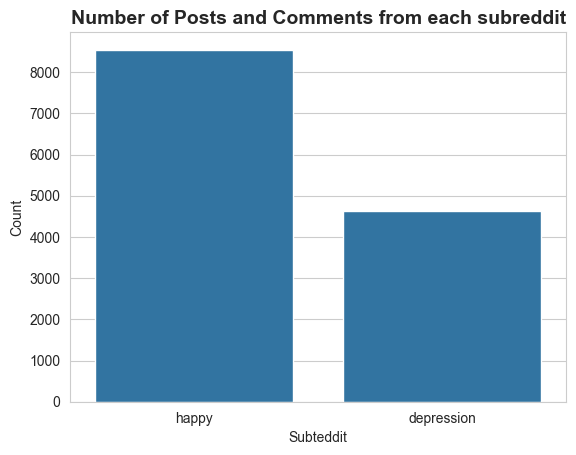

In [23]:
sns.set_style('whitegrid')
sns.barplot(df['subreddit'].value_counts())
plt.xlabel('Subteddit')
plt.ylabel('Count');
plt.title("Number of Posts and Comments from each subreddit", weight = 'bold', fontsize = 14);

The graph above shows the distribution of the number of posts downloaded from each respective subreddit. There is an imbalance between the classes, with more posts from the `happy` subreddit compared to the `depression` subreddit. This imbalance will be further evaluated in the modeling section of the notebook.

#### **2.2 EDA - Post length from each subreddit**


In [24]:
#count number of words on each rows 
depression_word_count = df.loc[df['subreddit'] == 'depression']['tokenize'].str.len()
happy_word_count = df.loc[df['subreddit'] == 'happy']['tokenize'].str.len()

In [25]:
depression_word_count.describe()

count    4633.000000
mean       42.222102
std        63.187867
min         0.000000
25%         8.000000
50%        22.000000
75%        53.000000
max      1685.000000
Name: tokenize, dtype: float64

In [26]:
happy_word_count.describe()

count    8545.000000
mean       12.532709
std        26.994991
min         0.000000
25%         2.000000
50%         5.000000
75%        12.000000
max       631.000000
Name: tokenize, dtype: float64

Looking at the means, the average number of words per post in `r/depression` is 42, while in `r/happy` it is 12. This shows that posts in `r/depression` tend to be longer than those in `r/happy`. This could be due to users in `r/depression` tend to share more detailed or elaborate posts, possibly reflecting the complexity and depth of their experiences and emotions.

#### **2.3 EDA - Histogram of number of words per post**


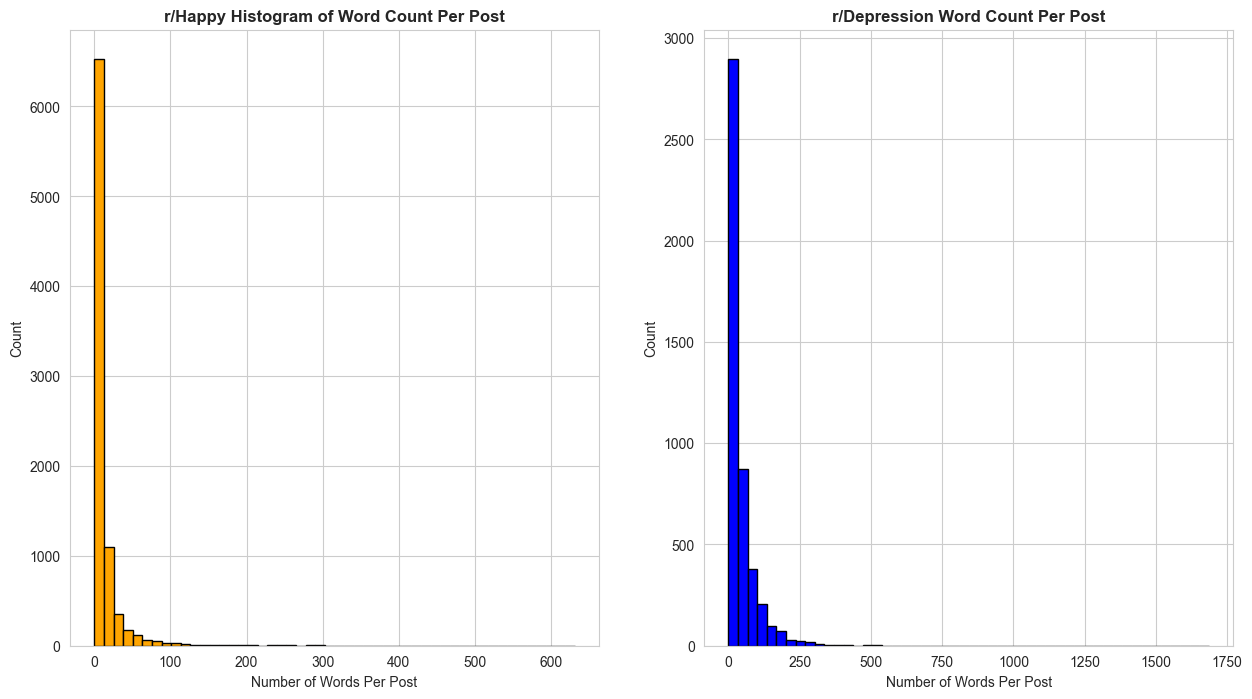

In [27]:
fig, ax = plt.subplots(1,2, figsize = (15,8))

ax[0].hist(happy_word_count, bins = 50, edgecolor = 'black', color = 'orange');
ax[0].set_title("r/Happy Histogram of Word Count Per Post", weight = 'bold');
ax[0].set_xlabel("Number of Words Per Post");
ax[0].set_ylabel("Count");

ax[1].hist(depression_word_count, bins = 50, edgecolor = 'black', color = 'blue');
ax[1].set_title("r/Depression Word Count Per Post", weight = 'bold');
ax[1].set_xlabel("Number of Words Per Post");
ax[1].set_ylabel("Count");

The graph above shows the distribution of the number of words per post for each subreddit. The majority of posts contain around 0-30 words for both subreddits. 
This could imply that most users on both subreddits tend to share brief posts. In `r/depression`, despite the average post length being longer, a significant portion of posts are still relatively short, possibly reflecting quick expressions of feelings or thoughts. In `r/happy`, the tendency for shorter posts aligns with the overall average, suggesting that users often share concise, to-the-point positive experiences

#### **2.4 EDA - Outlier Evaluation**


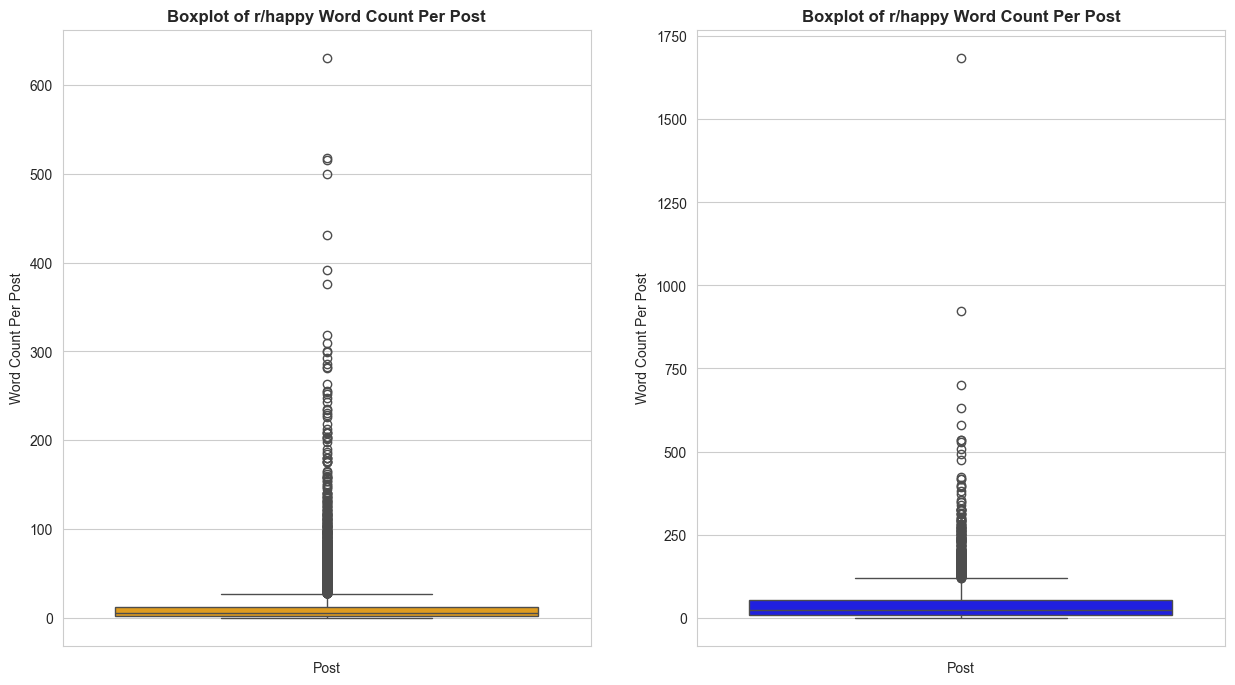

In [28]:
fig, ax = plt.subplots(1,2, figsize = (15,8))

sns.boxplot(data =happy_word_count, ax = ax[0], color = 'orange')
ax[0].set_title("Boxplot of r/happy Word Count Per Post", weight = 'bold')
ax[0].set_xlabel("Post")
ax[0].set_ylabel("Word Count Per Post");

sns.boxplot(data =depression_word_count, ax = ax[1], color = 'blue')
ax[1].set_title("Boxplot of r/happy Word Count Per Post", weight = 'bold')
ax[1].set_xlabel("Post")
ax[1].set_ylabel("Word Count Per Post");

Based on the boxplot for each subreddit, there are numerous outliers in terms of the number of words per post. However, for our NLP model, we break down these posts into individual words. Therefore, the presence of outliers in the number of words per post does not impact our model.

#### **2.5 EDA - Word Cloud for Each Subreddit**


In [29]:
#create variable to filter lemmatized word with respect to subreddit
happy_lemma = df.loc[df['subreddit'] == 'happy']['lemmatized']
depression_lemma = df.loc[df['subreddit'] == 'depression']['lemmatized']

#create variable to filter stemmed word with respect to subreddit
happy_stem = df.loc[df['subreddit'] == 'happy']['stemmed']
depression_stem = df.loc[df['subreddit'] == 'depression']['stemmed']


In [30]:
#convert to list, for word cloud purpose
depression_lemma_list = list(chain.from_iterable(depression_lemma))
happy_lemma_list = list(chain.from_iterable(happy_lemma))
depression_stem_list = list(chain.from_iterable(depression_stem))
happy_stem_list = list(chain.from_iterable(happy_stem))

In [31]:
#create function to plot wordcloud 
def wordcloud(happy_data, depression_data):
    
    #create plot
    fig, ax = plt.subplots(1,2, figsize=(20,10));

    #create happy subreddit word cloud
    wordcloud_happy = WordCloud(max_font_size=50,
                                max_words=50,
                                background_color='white', 
                                stopwords=None,
                                collocations = False,
                                colormap='flag').generate(' '.join(happy_data)) #worcloud reads string input 

    #create depression subreddit word cloud
    wordcloud_depression = WordCloud(max_font_size=50,
                                max_words=50,
                                background_color='white', 
                                collocations = False,
                                stopwords=None,
                                colormap='flag').generate(' '.join(depression_data))

    #plot happy word cloud
    ax[0].imshow(wordcloud_happy , interpolation='bilinear');
    ax[0].set_title("r/Happy", weight = 'bold');
    ax[0].axis('off');

    #plot depression word cloud
    ax[1].imshow(wordcloud_depression , interpolation='bilinear');
    ax[1].set_title("Depression", weight = 'bold');
    ax[1].axis('off');

    plt.show();
    
    #display most common words in descending order
    happy_word_frequencies = wordcloud_happy.words_
    depression_word_frequencies = wordcloud_depression.words_
    print(happy_word_frequencies)
    print(depression_word_frequencies)

##### **2.5.1 Word cloud for lemmatized words**

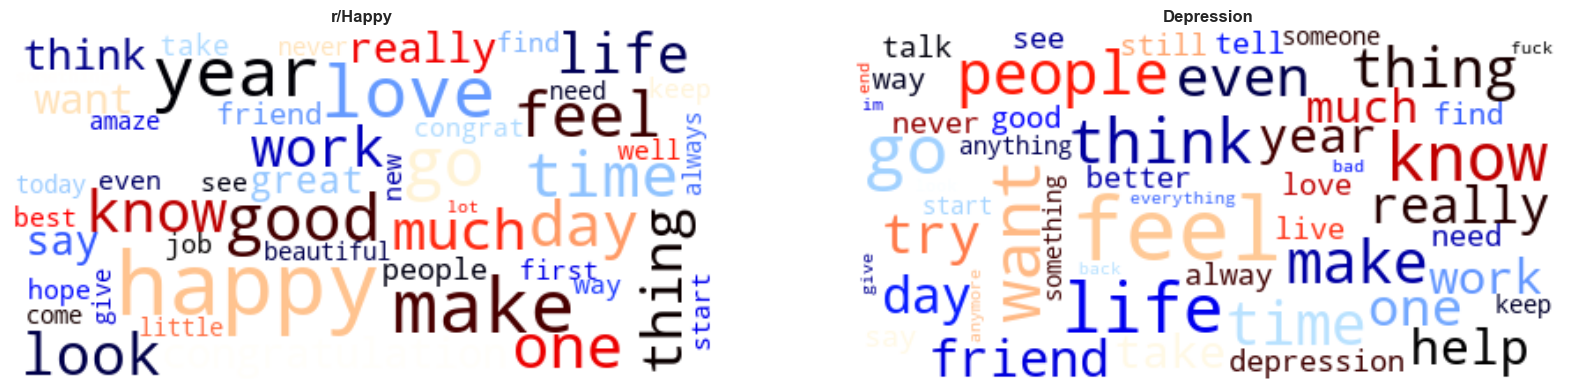

{'happy': 1.0, 'make': 0.736534717715769, 'love': 0.682024659312135, 'thank': 0.682024659312135, 'year': 0.6424399740428294, 'go': 0.6171317326411421, 'good': 0.554834523036989, 'time': 0.5256327060350422, 'day': 0.4990266060999351, 'one': 0.4983776768332252, 'feel': 0.49513303049967555, 'look': 0.4373783257624919, 'know': 0.4289422452952628, 'much': 0.4133679428942245, 'thing': 0.41012329656067487, 'life': 0.3951979234263465, 'work': 0.39390006489292667, 'congratulation': 0.3854639844256976, 'think': 0.3789746917585983, 'really': 0.3698896820246593, 'want': 0.3582089552238806, 'say': 0.33679428942245293, 'great': 0.3309539260220636, 'people': 0.32511356262167423, 'friend': 0.3218689162881246, 'take': 0.2965606748864374, 'new': 0.27514600908500975, 'best': 0.25697598961713175, 'keep': 0.25502920181700195, 'even': 0.25502920181700195, 'congrat': 0.254380272550292, 'see': 0.25308241401687215, 'first': 0.2511356262167424, 'hope': 0.25048669695003245, 'find': 0.24659312134977288, 'start': 

In [32]:
wordcloud(happy_lemma_list,depression_lemma_list)

We can observe the top 3 words from each subreddit:
- r/happy : happy, good, say
- r/depression : feel, go, want

##### **2.5.2 Word cloud for stemmed words**

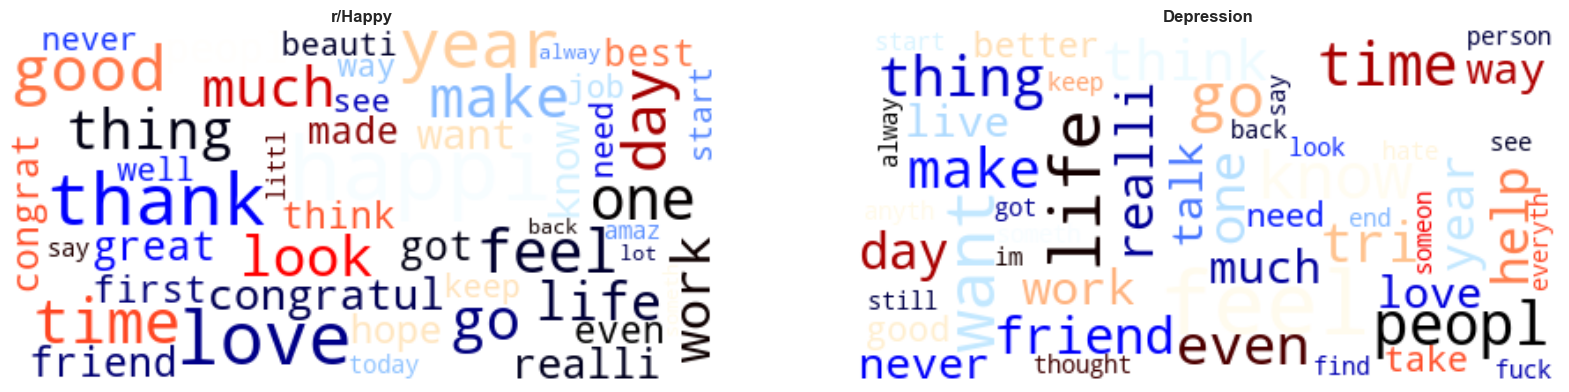

{'happi': 1.0, 'love': 0.6705675833820948, 'thank': 0.6342890579286132, 'year': 0.5792861322410766, 'good': 0.5049736688121709, 'time': 0.4739613809245173, 'day': 0.4499707431246343, 'one': 0.44938560561732005, 'feel': 0.446459918080749, 'go': 0.4253949678174371, 'make': 0.42480983031012287, 'look': 0.3943826799297835, 'much': 0.3727325921591574, 'thing': 0.3698069046225863, 'life': 0.3563487419543593, 'work': 0.3551784669397308, 'congratul': 0.3487419543592744, 'realli': 0.3335283791691047, 'know': 0.32475131655939143, 'want': 0.3229959040374488, 'great': 0.30017554125219426, 'got': 0.29900526623756585, 'peopl': 0.29315389116442364, 'friend': 0.29022820362785257, 'hope': 0.2732592159157402, 'new': 0.2480983031012288, 'made': 0.2393212404915155, 'best': 0.23171445289643067, 'think': 0.23112931538911644, 'even': 0.229959040374488, 'congrat': 0.2293739028671738, 'first': 0.2264482153306027, 'beauti': 0.22469280280866002, 'start': 0.22118197776477472, 'well': 0.2205968402574605, 'job': 0.

In [33]:
wordcloud(happy_stem_list,depression_stem_list)

We can observe the top 3 words from each subreddit:
- r/happy : happi, love, thank
- r/depression : feel, want, life

### **2.6 EDA - Single Word Frequncies**


In [34]:
#create function to plot words frequencies

def plot_word(happy_data, depression_data):
    happy_word_count = nltk.FreqDist(chain.from_iterable(happy_data)) #combine lists of list into 1 list for happy

    df_happycount = pd.DataFrame(happy_word_count.most_common(30), columns = ['word', 'count'])#create a dataframe 

    depression_word_count = nltk.FreqDist(chain.from_iterable(depression_data)) #combine lists of list into 1 list for depression

    df_depressioncount = pd.DataFrame(depression_word_count.most_common(30), columns = ['word', 'count'])

    fig, ax = plt.subplots(1,2, figsize=(20,10))
    #plot graph for number of words 
    sns.barplot(x ='count', y='word', data=df_happycount, ax= ax[0], color='orange')
    sns.barplot(x ='count', y='word', data=df_depressioncount, ax= ax[1], color='blue')

    #label graph for r/happy
    ax[0].set_title("r/happy Top Word Frequncies", weight = 'bold');
    ax[0].set_xlabel("Count");
    ax[0].set_ylabel('Word');

    #show numbers on the graph
    for index, value in enumerate(df_happycount['count']):
        ax[0].text(value/2, index, str(value), color='white', ha='left', va = 'center');

    #label graph for r/depression
    ax[1].set_title("r/depression Top 30 Word Frequncies", weight = 'bold');
    ax[1].set_xlabel("Count");
    ax[1].set_ylabel('Word');

    #show numbers on the graph
    for index,value in enumerate(df_depressioncount['count']):
        ax[1].text(value/2, index, str(value), color = 'white', va= 'center')

##### **2.6.1 Lemmatized words**

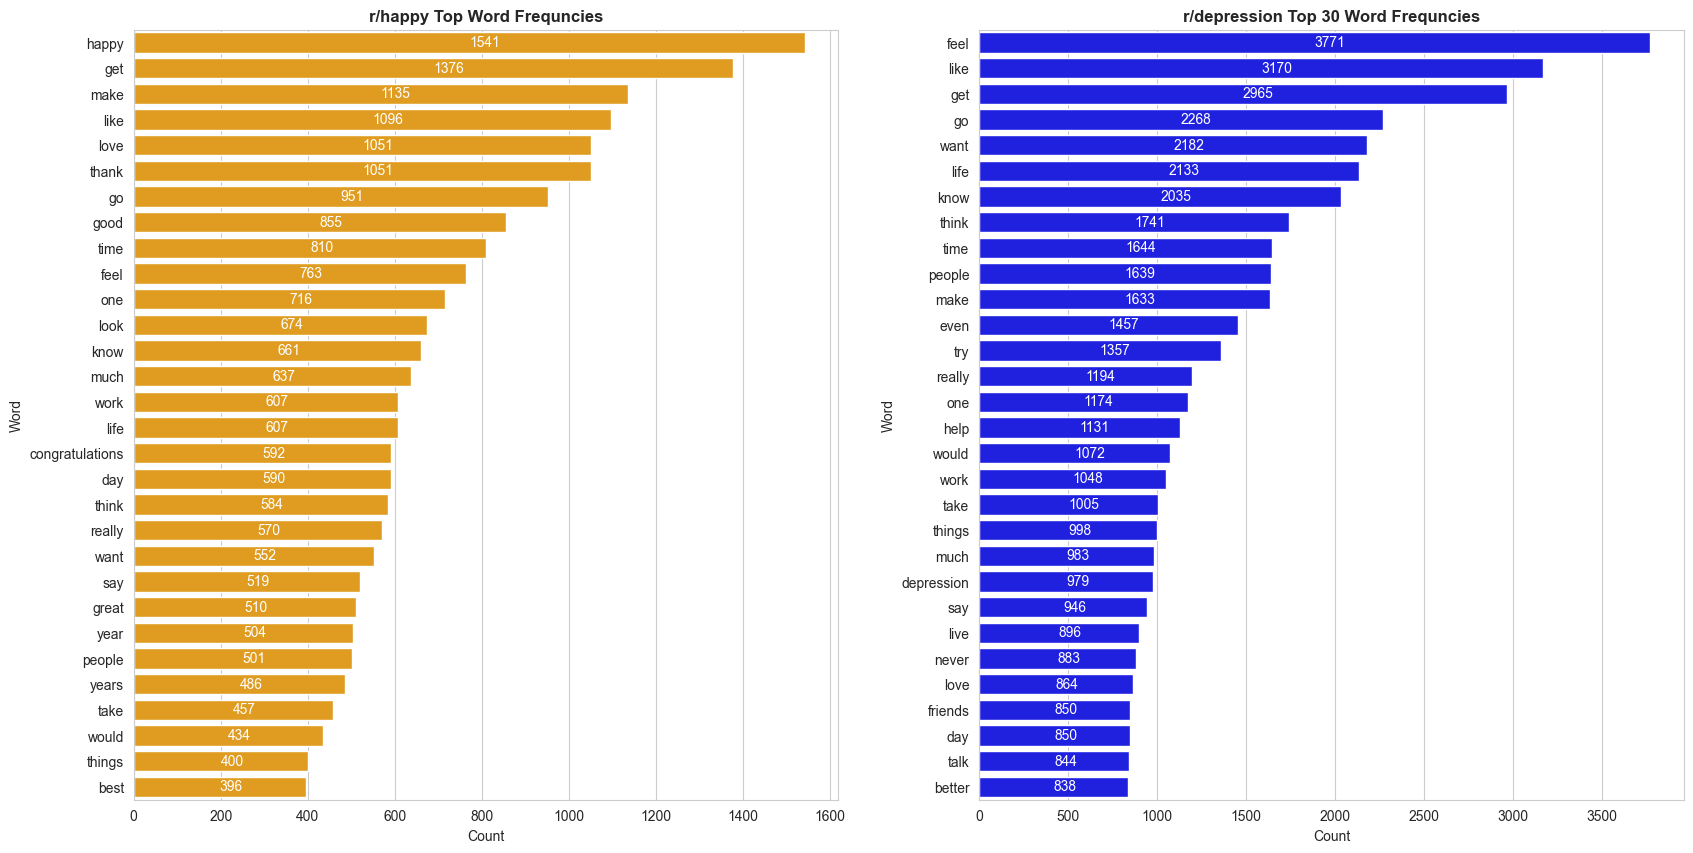

In [35]:
plot_word(happy_lemma,depression_lemma)

From the graph, we can observe the top words from each subreddit. This serves as an alternative representation to a word cloud for identifying the most frequently used words.

##### **2.6.2 Stemmed Words**

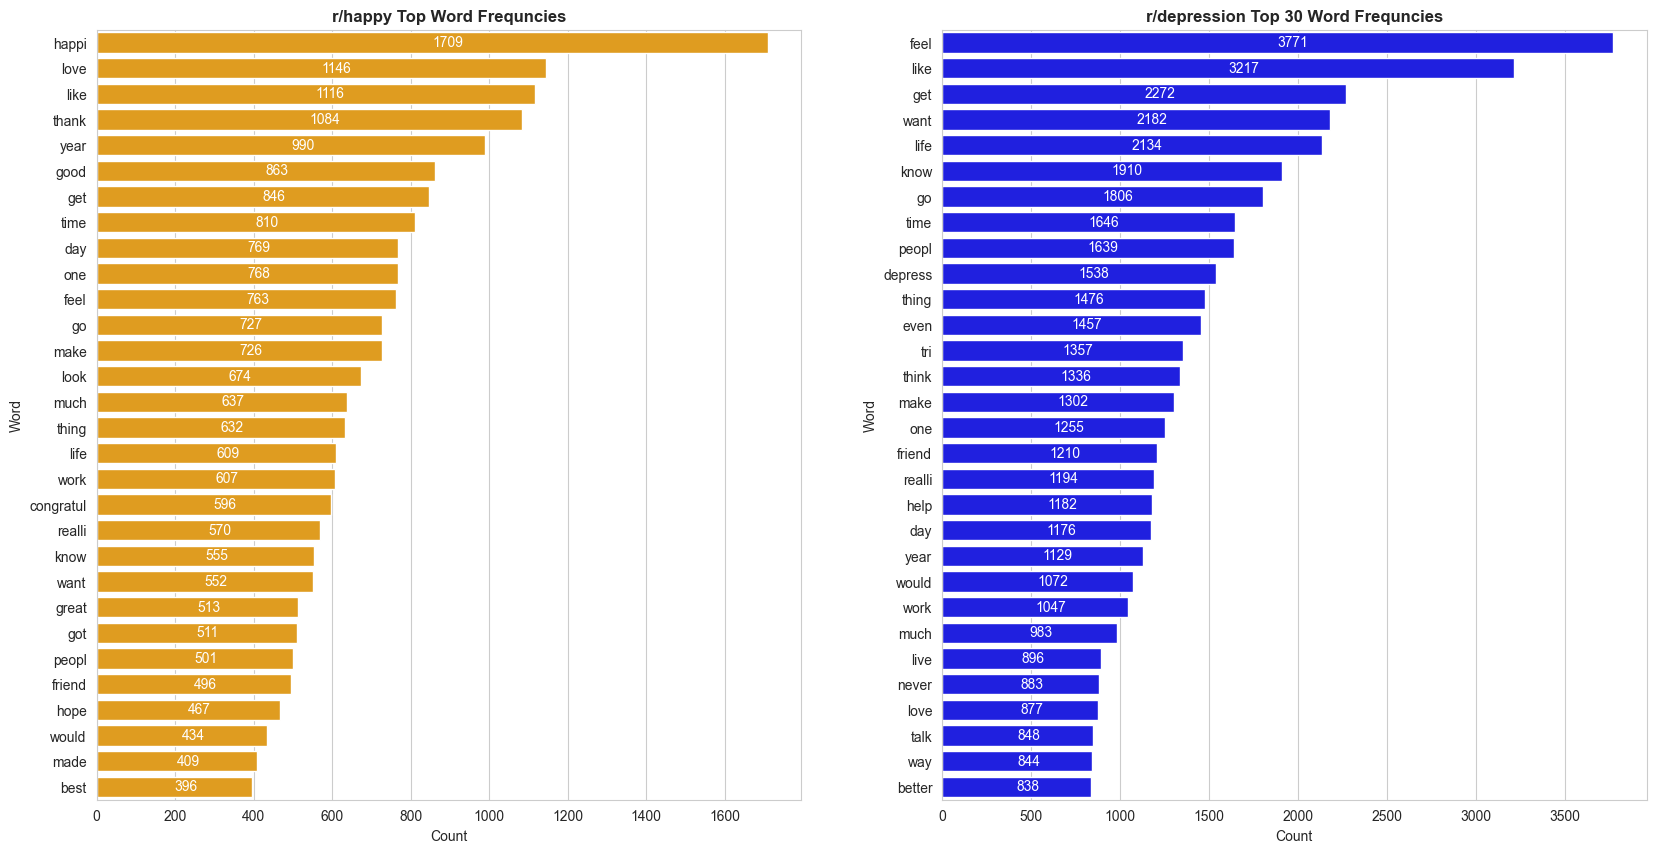

In [36]:
plot_word(happy_stem,depression_stem)

From the graph, we can observe the top words from each subreddit. This serves as an alternative representation to a word cloud for identifying the most frequently used words.

#### **2.7 EDA - 2 Grams Words**
---
Bigrams (2-grams) capture sequences of two consecutive words in the text, allowing the model to understand and analyze common word pairs and the context in which words typically appear together.


##### **2.7.1 Lemmatized words**

In [37]:
df_happy = df[df['subreddit'] == 'happy'].reset_index(drop = True)
df_depression = df[df['subreddit'] == 'depression'].reset_index(drop = True)

#create variable to filter lemmatized word with respect to subreddit
happy_lemma = df.loc[df['subreddit'] == 'happy']['lemmatized']
depression_lemma = df.loc[df['subreddit'] == 'depression']['lemmatized']

In [38]:
#create function to get top 20 most used words
def twograms(data,title):
    #Instantiate model
    cvec = CountVectorizer(ngram_range = (2,2))
    #fit and transform model
    two_gram = cvec.fit_transform([' '.join(word) for word in data[title]])
    #convert to dataframe
    df_two_gram = pd.DataFrame(two_gram.toarray(),columns = cvec.get_feature_names_out())
    #get top 20 highest count for two words
    top30 = pd.DataFrame(df_two_gram.sum(axis=0).sort_values(ascending=False)[0:30], columns=['count'])
    #add words columns to dataframe 
    top30['words'] = top30.index
    #convert index to numeric
    top30.index = range(len(top30))

    return top30


In [39]:
#call function to get top30 2 grams from both subreddit
twograms_depression = twograms(df_depression, 'lemmatized')
twograms_happy = twograms(df_happy,'lemmatized')

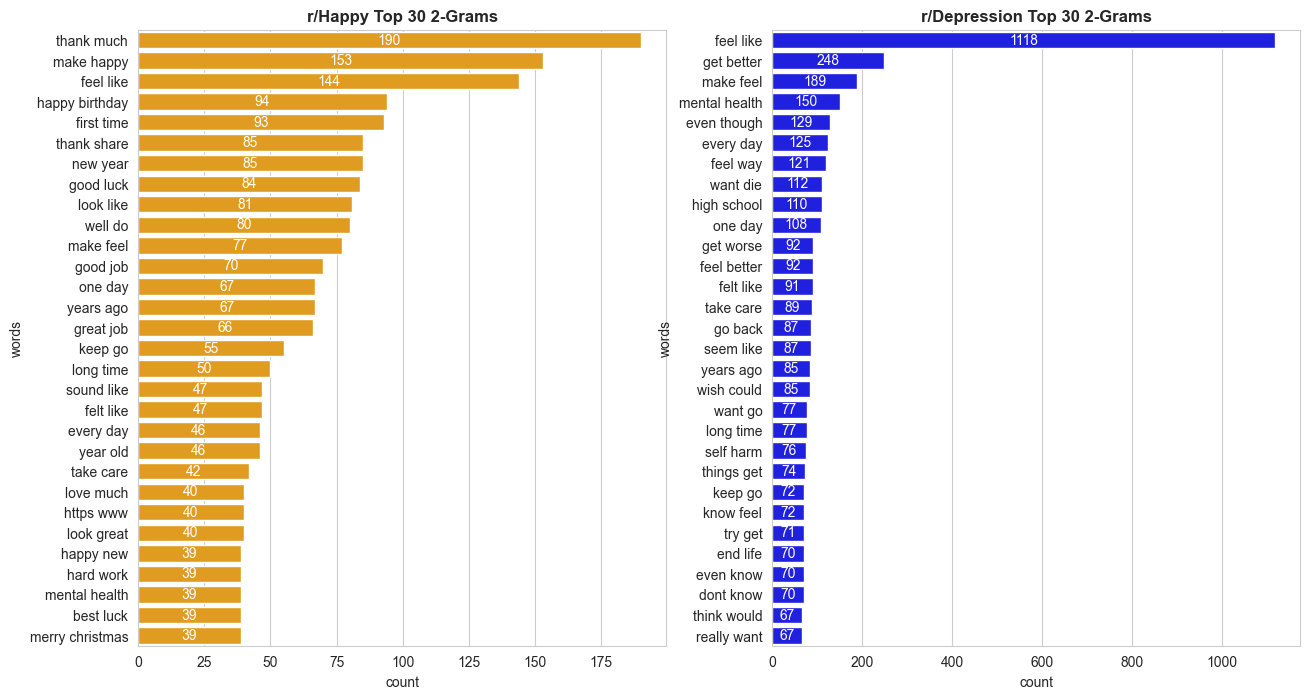

In [40]:
fig, ax = plt.subplots(1,2, figsize = (15,8))

#plot graph for r/happy
sns.barplot(x = 'count', y= 'words', data = twograms_happy, ax = ax[0], color = 'orange');
ax[0].set_title('r/Happy Top 30 2-Grams', weight = 'bold')

#show numbers on graph 
for index, value in enumerate(twograms_happy['count']):
    ax[0].text(value/2, index, str(value), color='white', ha='center', va = 'center');


#plot graph for r/depression
sns.barplot(x = 'count', y= 'words', data = twograms_depression, ax = ax[1], color = 'blue');
ax[1].set_title('r/Depression Top 30 2-Grams', weight = 'bold');

for index, value in enumerate(twograms_depression['count']):
    ax[1].text(value/2, index, str(value), color = 'white', ha= 'center', va= 'center')

From the graph we can identify the top 2 grams words from each subreddit. Below are the top 3 words:
- r/happy : thank much, make happy, feel like.
- r/depression : feel like, get better, make feel

We can see that there are common top 3 2-grams between these subreddit, which is `feel like`



##### **2.7.2 Stemmed words**

In [41]:
#call function to get top20 2 grams from both subreddit
twograms_depression_stem = twograms(df_depression, 'stemmed')
twograms_happy_stem = twograms(df_happy,'stemmed')

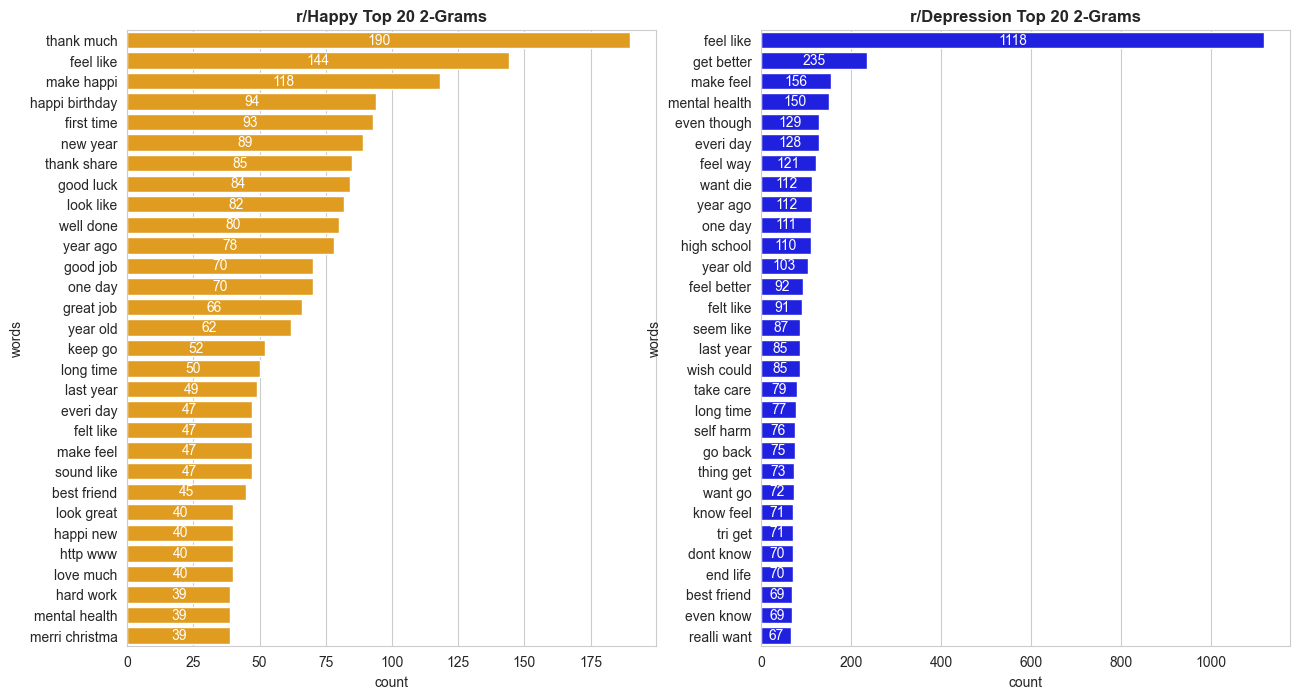

In [42]:
fig, ax = plt.subplots(1,2, figsize = (15,8))

#plot graph for r/happy
sns.barplot(x = 'count', y= 'words', data = twograms_happy_stem, ax = ax[0], color = 'orange');
ax[0].set_title('r/Happy Top 20 2-Grams', weight = 'bold')

#show numbers on graph 
for index, value in enumerate(twograms_happy_stem['count']):
    ax[0].text(value/2, index, str(value), color='white', ha='center', va = 'center');


#plot graph for r/depression
sns.barplot(x = 'count', y= 'words', data = twograms_depression_stem, ax = ax[1], color = 'blue');
ax[1].set_title('r/Depression Top 20 2-Grams', weight = 'bold');

for index, value in enumerate(twograms_depression_stem['count']):
    ax[1].text(value/2, index, str(value), color = 'white', ha= 'center', va= 'center')

Looking at comparison between `stemmed` and `lemmatized` words, `lemmatized` produce words that are registered in dictionary. We will continue to do further filtering using lemmatized words 



#### **2.8 EDA - Venn Diagram for Top 100 Words between r/depression and r/happy**

In [43]:
#create function to get top 100 words
def top100(data,title):
    #Instantiate model
    cvec = CountVectorizer()
    #fit and transform model
    one_gram = cvec.fit_transform([' '.join(word) for word in data[title]])
    #convert to dataframe
    df_one_gram = pd.DataFrame(one_gram.toarray(),columns = cvec.get_feature_names_out())
    #get top 20 highest count for two words
    top100 = pd.DataFrame(df_one_gram.sum(axis=0).sort_values(ascending=False)[0:100], columns=['count'])
    #add words columns to dataframe 
    top100['words'] = top100.index
    #convert index to numeric
    top100.index = range(len(top100))

    return top100


In [44]:
#call function and store to following variables
depression_top_100 = top100(df_depression,'lemmatized')
happy_top_100 = top100(df_happy,'lemmatized')

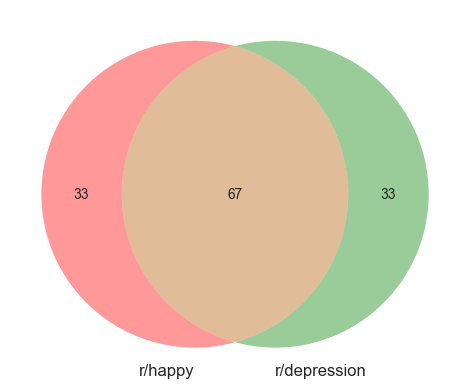

In [45]:
#plot venn diagram 
venn2(subsets=(set(happy_top_100['words']), set(depression_top_100['words'])),
      set_labels=('r/happy', 'r/depression'));

Based on the Venn diagram, we found that many of the top 100 words are similar between `r/happy` and `r/depression`. To create clearer classification between the two subreddits, we will filter out these common words.

### **3. Data Preprocessing Part 2**

---
In this part of data preprocessing, we will further filter the data using custom stopwords. Since using the default `english` stopwords is not sufficient to filter out all unwanted words, we will create a new list of custom stopwords to remove words that do not add value to our analysis. Additionally, we will filter out common words shared between `r/happy` and `r/depression` to enhance the distinction between the two datasets.



Define Custom Stopwords

In [46]:
#define custom stopwords
custom_stopwords = ['ur','us','may','many', 'nd', 'either', 'might', 'unless',
                    'even', 'https', 'en', 'org', 'name', 'two' , 'im', 'ive',
                    'yet', 'two', 'op', 'ops', 'usually', 'pm', 'pms', 'else',
                    'often', 'ones', 'would', 'alt', 'others', 'except', 'many',
                    'much','also', 'always', 'www', 'com', 'since', 'everyone',
                    'ysk', 'yalls', 'cuz','coulda', 'really', 'day', 'ei',
                    'ol', 'nada', 'year','years', 'oc', 'month', 'hours','week',
                    'day', 'awwww', 'btw'
                    ]

Define common words between `r/happy` and `r/depression` 

In [47]:
#identify common words
common_words = set(depression_top_100['words'].tolist()) & set(happy_top_100['words'].tolist())

Filter datasets

In [48]:
#create function for stopwords removal
def custom_stopword_filter(data, stopword):
    for i in range(len(data)):
        data[i] = [word for word in data[i] if word not in stopword]

    return

In [49]:
#filter based on created custom stopword 
custom_stopword_filter(df['lemmatized'],stopword=custom_stopwords)

In [50]:
#filter based on common words
custom_stopword_filter(df['lemmatized'], stopword=common_words)

Venn Diagram for Top 100 Words between `r/depression` and `r/happy`

In [51]:
df_happy = df[df['subreddit'] == 'happy'].reset_index(drop = True)
df_depression = df[df['subreddit'] == 'depression'].reset_index(drop = True)

#call function and store to following variables
depression_top_100 = top100(df_depression,'lemmatized')
happy_top_100 = top100(df_happy,'lemmatized')

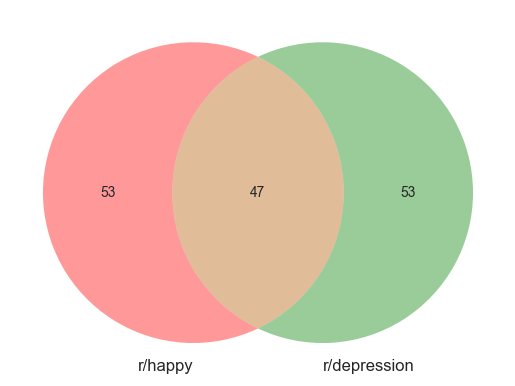

In [52]:
#plot venn diagram 
venn2(subsets=(set(happy_top_100['words']), set(depression_top_100['words'])),
      set_labels=('r/happy', 'r/depression'));

As there are still a lot of common words between r/happy and r/depression, we will conduct another round of common word filter.


### **4. Data Preprocessing Part 3**

---

Define common words

In [53]:
common_words = set(depression_top_100['words'].tolist()) & set(happy_top_100['words'].tolist())

Filter datasets 

In [54]:
#filter based on common words
custom_stopword_filter(df['lemmatized'], stopword=common_words)

 Venn Diagram for Top 100 Words between `r/depression` and `r/happy`


In [55]:
df_happy = df[df['subreddit'] == 'happy'].reset_index(drop = True)
df_depression = df[df['subreddit'] == 'depression'].reset_index(drop = True)

#call function and store to following variables
depression_top_100 = top100(df_depression,'lemmatized')
happy_top_100 = top100(df_happy,'lemmatized')

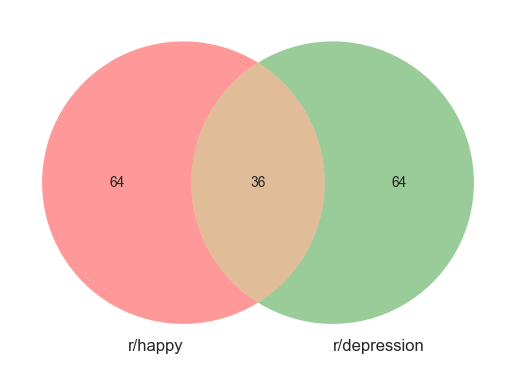

In [56]:
#plot venn diagram 
venn2(subsets=(set(happy_top_100['words']), set(depression_top_100['words'])),
      set_labels=('r/happy', 'r/depression'));

As there are still a lot of common words between r/happy and r/depression, we will conduct another round of common word filter


### **5. Data Preprocessing Part 4**

In [57]:
common_words = set(depression_top_100['words'].tolist()) & set(happy_top_100['words'].tolist())

In [58]:
#filter based on common words
custom_stopword_filter(df['lemmatized'], stopword=common_words)

In [59]:
df_happy = df[df['subreddit'] == 'happy'].reset_index(drop = True)
df_depression = df[df['subreddit'] == 'depression'].reset_index(drop = True)

#call function and store to following variables
depression_top_100 = top100(df_depression,'lemmatized')
happy_top_100 = top100(df_happy,'lemmatized')

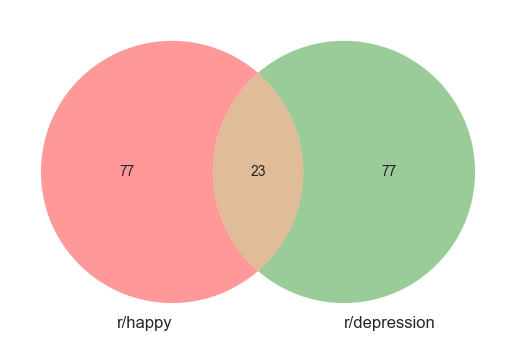

In [60]:
#plot venn diagram 
venn2(subsets=(set(happy_top_100['words']), set(depression_top_100['words'])),
      set_labels=('r/happy', 'r/depression'));

The top 100 common words between `r/happy` and `r/depression` have been reduced to 23 words, which are considered insignificant.


### **6. Exploratory Data Analysis(EDA) : Part 2**

---

#### **6.1 EDA - Single Word Frequncies**


In [61]:
df_happy = df[df['subreddit'] == 'happy'].reset_index(drop = True)
df_depression = df[df['subreddit'] == 'depression'].reset_index(drop = True)

#create variable to filter lemmatized word with respect to subreddit
happy_lemma = df.loc[df['subreddit'] == 'happy']['lemmatized']
depression_lemma = df.loc[df['subreddit'] == 'depression']['lemmatized']

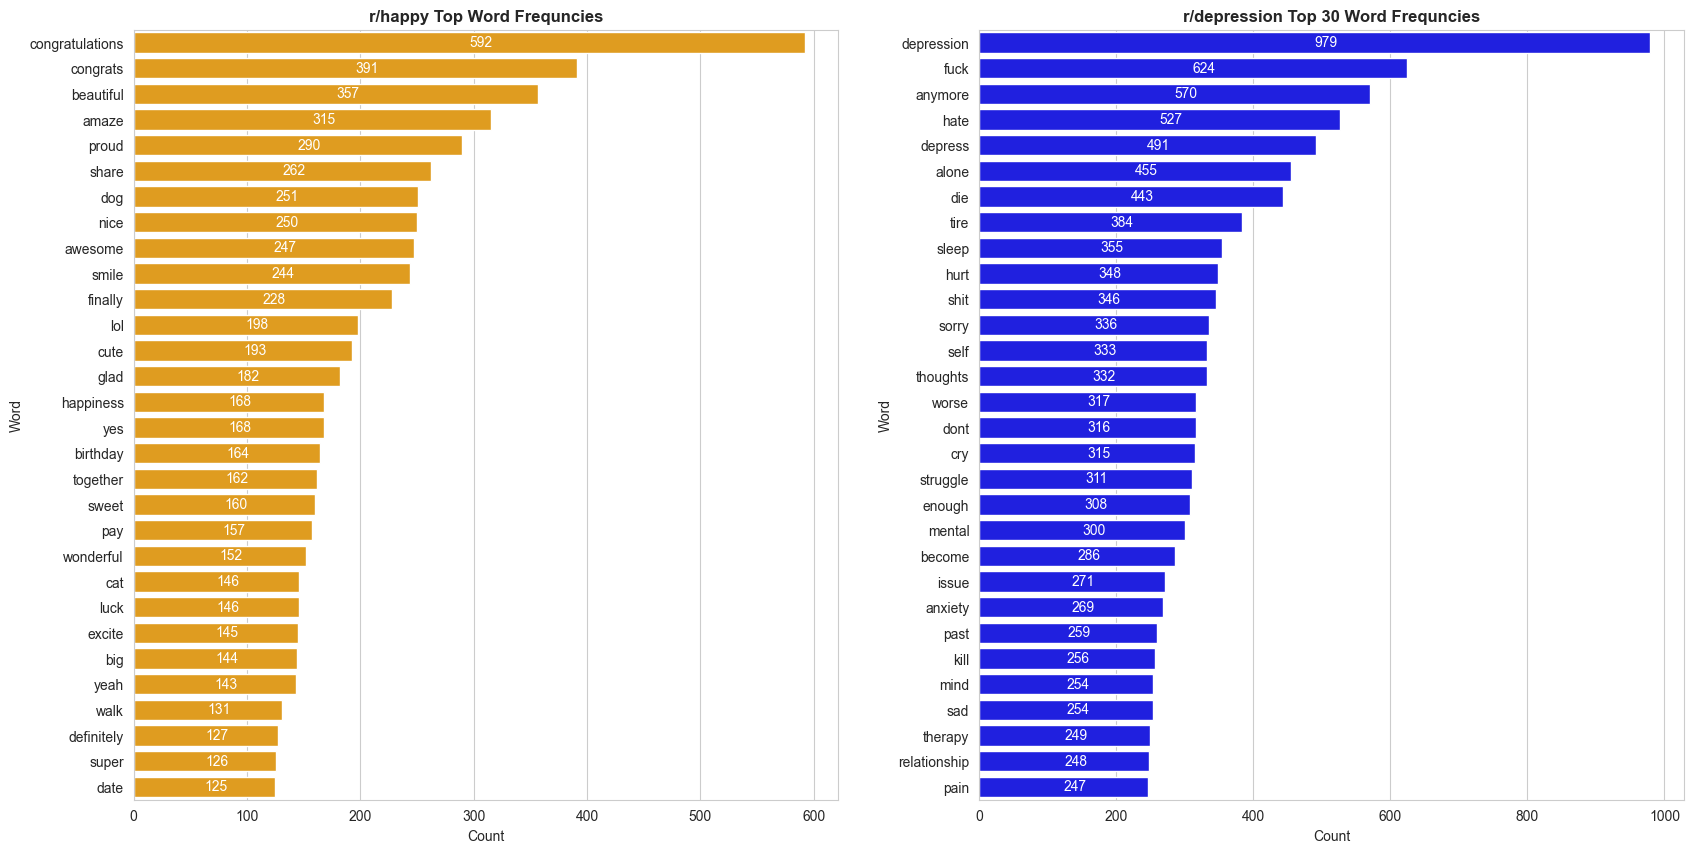

In [62]:
plot_word(happy_lemma,depression_lemma)

We can observe the top 3 words from each subreddit:
- r/happy : congratulations, congrats, beautiful
- r/depression : depression, f**k, anymore



#### **6.2 EDA - 2 Grams Words**


In [63]:
#call function to get top30 2 grams from both subreddit
twograms_depression = twograms(df_depression, 'lemmatized')
twograms_happy = twograms(df_happy,'lemmatized')

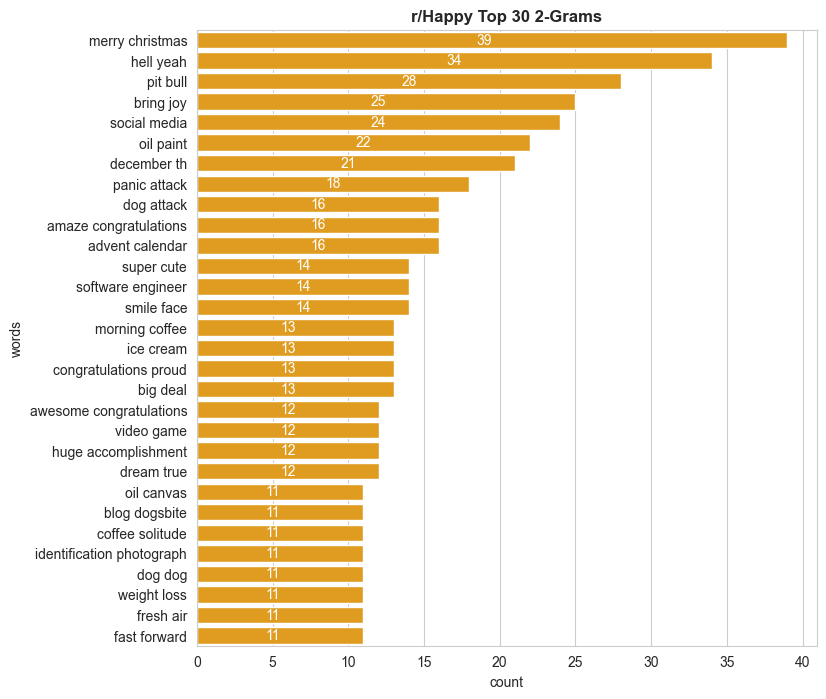

In [64]:
#plot r/happy
plt.figure(figsize=(8,8))

#plot graph for r/happy
sns.barplot(x = 'count', y= 'words', data = twograms_happy, color = 'orange');
plt.title('r/Happy Top 30 2-Grams', weight = 'bold')

#show numbers on graph 
for index, value in enumerate(twograms_happy['count']):
    plt.text(value//2, index, str(value), color='white', ha='center', va = 'center');




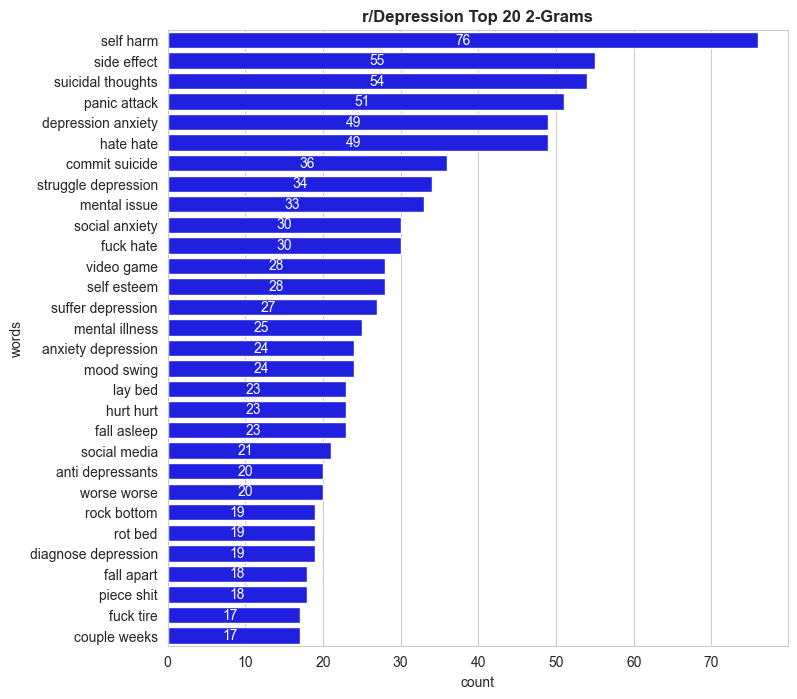

In [65]:
#plot r/depression
plt.figure(figsize = (8,8))
sns.barplot(x='count', y='words', data=twograms_depression, color='blue')
plt.title('r/Depression Top 20 2-Grams', weight='bold')

# Add annotations
for index, value in enumerate(twograms_depression['count']):
    plt.text(value//2, index, str(value), color='white', ha='center', va='center')

# Show the plot
plt.show()

We can observe the top 3 2-grams from each subreddit:
- r/happy : merry christmas, hell yeah, pit bull
- r/depression : self harm, side effect, suicidal thoughts 



#### **6.3 EDA - Word Cloud**


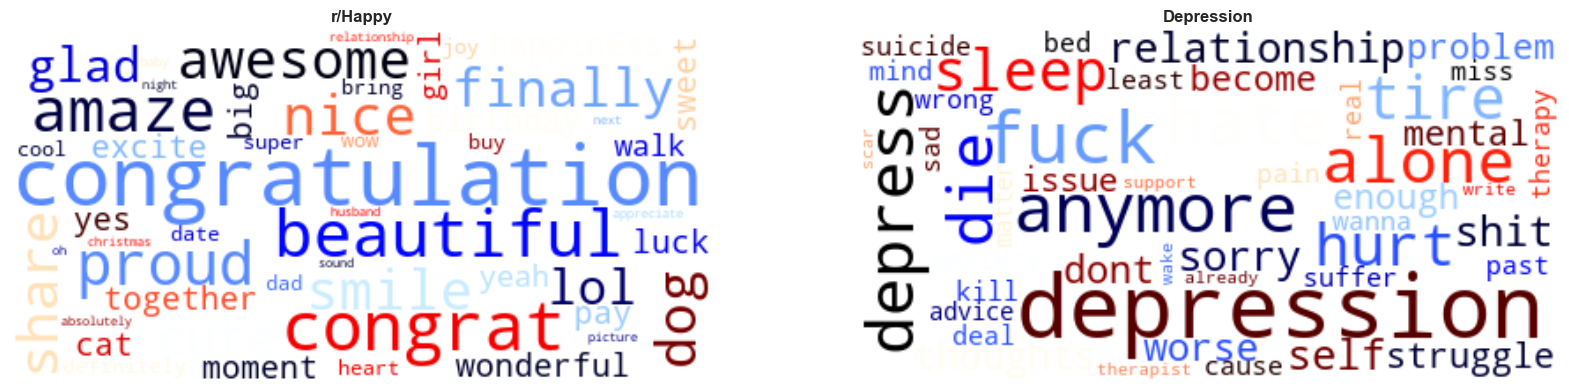

{'congratulation': 1.0, 'congrat': 0.6599326599326599, 'beautiful': 0.601010101010101, 'amaze': 0.5303030303030303, 'proud': 0.4882154882154882, 'share': 0.44107744107744107, 'dog': 0.4225589225589226, 'nice': 0.4208754208754209, 'awesome': 0.4158249158249158, 'smile': 0.4107744107744108, 'finally': 0.3838383838383838, 'lol': 0.3333333333333333, 'cute': 0.32491582491582494, 'glad': 0.3063973063973064, 'birthday': 0.2895622895622896, 'sweet': 0.2845117845117845, 'happiness': 0.2828282828282828, 'yes': 0.2828282828282828, 'together': 0.2727272727272727, 'pay': 0.26430976430976433, 'moment': 0.25925925925925924, 'wonderful': 0.2558922558922559, 'cat': 0.24579124579124578, 'luck': 0.24579124579124578, 'excite': 0.2441077441077441, 'big': 0.24242424242424243, 'yeah': 0.24074074074074073, 'girl': 0.234006734006734, 'walk': 0.22053872053872053, 'definitely': 0.2138047138047138, 'super': 0.21212121212121213, 'date': 0.21043771043771045, 'bring': 0.20875420875420875, 'heart': 0.2087542087542087

In [66]:
depression_lemma_list = list(chain.from_iterable(depression_lemma))
happy_lemma_list = list(chain.from_iterable(happy_lemma))
wordcloud(happy_lemma_list,depression_lemma_list)

### **7. Export Datasets to CSV File**

In [68]:
#export to csv file 
df.to_csv('../output/depression_happy_processed_final.csv', index=False )

---
Next: [04_Modelling](04_modelling.ipynb)